In [ ]:
import torch.nn as nn
from torchsummary import summary
import torch
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
img = cv2.imread('images.jpg')

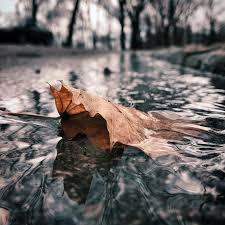

In [ ]:
cv2_imshow(img)

In [ ]:
class MobilenetBody(nn.Module):
    def __init__(self, in_channel, out_channel):
        super().__init__()
        """
        Conv dw / s1 3 × 3 × 128 dw     / 56 × 56 × 128
        Conv    / s1 1 × 1 × 128 × 128 / 56 × 56 × 128
        Conv dw / s2 3 × 3 × 128 dw     / 56 × 56 × 128
        Conv    / s1 1 × 1 × 128 × 256 / 28 × 28 × 128
        """
        self.conv_dw_s1 = nn.Conv2d(in_channel, in_channel, kernel_size=3, padding=1, groups=in_channel)
        self.conv_pw_s1 = nn.Conv2d(in_channel, in_channel, kernel_size=1)
        self.conv_dw_s2 = nn.Conv2d(in_channel, in_channel, kernel_size=3, stride=2, padding=1, groups=in_channel)
        self.conv_pw = nn.Conv2d(in_channel, out_channel, kernel_size=1)

    def forward(self, x):
        out = self.conv_dw_s1(x)
        out = self.conv_pw_s1(out)
        out = self.conv_dw_s2(out)
        out = self.conv_pw(out)
        return out

In [ ]:
class depthwise_separable_conv(nn.Module):
    def __init__(self, in_channel, out_channel):
        super().__init__()
        self.depthwise = nn.Conv2d(in_channel, in_channel, kernel_size=3, padding=1, groups=in_channel)
        self.pointwise = nn.Conv2d(in_channel, out_channel, kernel_size=1)

    def forward(self, x):
        out = self.depthwise(x)
        out = self.pointwise(out)
        return out

In [ ]:
dsc = MobilenetBody(3,6)

In [ ]:
print(type(img))
torch_img = torch.Tensor(img)
print(torch_img.shape)

<class 'numpy.ndarray'>
torch.Size([225, 225, 3])


In [ ]:
print(dsc)

MobilenetBody(
  (conv_dw_s1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3)
  (conv_pw_s1): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (conv_dw_s2): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=3)
  (conv_pw): Conv2d(3, 6, kernel_size=(1, 1), stride=(1, 1))
)


In [ ]:
image = np.transpose(torch_img,(2,0,1))

In [ ]:
image = torch.unsqueeze(image,0)
image.shape

torch.Size([1, 3, 225, 225])

In [ ]:
dimg = dsc(image)

In [ ]:
dimg.shape

torch.Size([1, 6, 113, 113])

In [ ]:
dimg = torch.squeeze(dimg)
dimg.shape

torch.Size([6, 225, 225])

In [ ]:
dimg1 = np.transpose(dimg.detach()[:3].numpy(),(1,2,0))
dimg2 = np.transpose(dimg.detach()[3:].numpy(),(1,2,0))

In [ ]:
dimg2.shape

(225, 225, 3)

In [ ]:
dimg.shape

torch.Size([6, 225, 225])

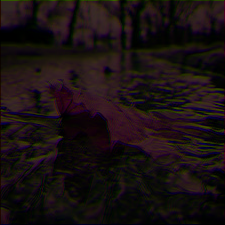

In [ ]:
cv2_imshow(dimg1)

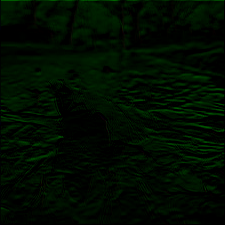

In [ ]:
cv2_imshow(dimg2)

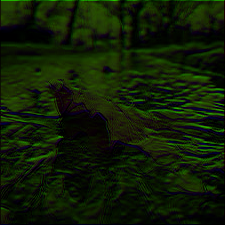

In [ ]:
cv2_imshow(dimg1+dimg2)